# Augmentations

In [75]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import numpy as np
import trimesh

from util.visualization_utils import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Princeton Segmentation Benchmark

In [76]:
# Load one sample and visualize
sample = trimesh.load("./data/MeshsegBenchmark-1.0/data/off/1.off")
visualize_mesh(sample)

Output()

In [77]:
# Sample points from the given mesh to create a pointcloud
res = 20
points, face_indices = trimesh.sample.sample_surface(sample,res**3)
visualize_pointcloud(points)

Output()

## Scale

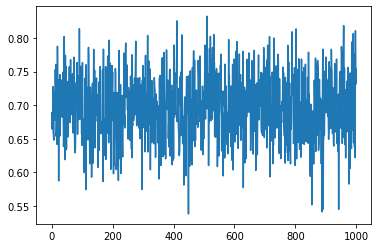

In [119]:
import matplotlib.pyplot as plt
plt.plot(np.random.normal(0.7, 0.05, 1000))

In [134]:
def scale(points):
    """
    Scales the object. The scale value is sampled from a normal distribution 
    with 0.7 mean and 0.05 variance

    Parameters
    ----------

    points (ndarray): 3D object
    
    Returns
    -------

    out (ndarray) : Augmentated 3D object
    """
    points_temp = points.copy()
    scale = np.random.normal(0.7, 0.05, 1)
    points_temp = points_temp*scale
    print
    return points_temp
    
visualize_pointcloud(scale(points))

Output()

## Flip

In [72]:
def flip(points):
    """
    Flip the object over x or y axis.

    Parameters
    ----------

    points (ndarray): 3D object
    
    Returns
    -------

    out (ndarray) : Augmentated 3D object
    """
    points_temp = points.copy()
    index = np.random.choice(2, 1)
    points_temp[:,index] = -points_temp[:,index]
    return points_temp
    
visualize_pointcloud(flip(points))

Output()

## Gaussian Noise

In [67]:
def gaussian_white_noise(points):
    """
    Additive Gaussian white noise with zero mean and 0.008 variance.

    Parameters
    ----------

    points (ndarray): 3D object
    
    Returns
    -------

    out (ndarray) : Augmentated 3D object
    """
    points_temp = points.copy()
    GAUSS_NOISE_MU = 0
    GAUSS_NOISE_SIGMA = 0.008
    
    noise = np.random.normal(GAUSS_NOISE_MU, GAUSS_NOISE_SIGMA, points.shape)
    return points_temp + noise

visualize_pointcloud(gaussian_white_noise(points))

Output()